In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy as sp
import pandas as pd
import matplotlib as mpl

In [2]:
betamaxarray = ['0.5','1.0','2.0']
betamaxarray2 = ['05','1','2']
betamaxarray3 = ['0.5','1','2']

In [3]:
ta = np.linspace(0,1,400)
tau05 = np.linspace(0,0.5,400)
tau1 = np.linspace(0,1,400)
tau2 = np.linspace(0,2,400)

k = np.full(100,1)

garray = [0 for i in range(21)]
gsqaure = [0 for i in range(len(garray))]
gsqaureplus = [0 for i in range(25)]
gsquareround = [0 for i in range(len(garray))]

for i in range(len(garray)):
    if (i<20):
        garray[i+1] = round(garray[i]+0.05,2)
        gsqaure[i+1] = round(garray[i+1]**2,4)
        gsquareround[i+1] = round(garray[i+1]**2,4)
        gsqaureplus[i+1] = gsqaure[i+1]
    elif (i==20):
        gsqaure[i] = 1
        gsquareround[i] = '1.0'
        gsqaureplus[i] = gsqaure[i]

for j in range(21,25,1):
    gsqaureplus[j] = gsqaureplus[j-1] + 1

gsqaureplus

[0,
 0.0025,
 0.01,
 0.0225,
 0.04,
 0.0625,
 0.09,
 0.1225,
 0.16,
 0.2025,
 0.25,
 0.3025,
 0.36,
 0.4225,
 0.49,
 0.5625,
 0.64,
 0.7225,
 0.81,
 0.9025,
 1,
 2,
 3,
 4,
 5]

In [4]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0

g = 0
h = 0

index = 0

In [5]:
for j in betamaxarray2:
    for k in gsqaure:
        globals()['N_BETA{}G{}'.format(j,k)] = pd.read_csv('nTrap_grid800_beta{}_{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['N_{}_{}'.format(a,b)] = np.array(globals()['N_BETA{}G{}'.format(j,k)].y)
        b += 1
        
    a += 1
    b = 0

a = 0
b = 0

In [6]:
for j in betamaxarray2:
    for k in gsqaure:
        globals()['O_BETA{}G{}'.format(j,k)] = pd.read_csv('OCA_grid400_beta{}_g_{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['O_{}_{}'.format(a,b)] = np.delete(globals()['O_BETA{}G{}'.format(j,k)].y,-1)
        b += 1
        
    a += 1
    b = 0

a = 0
b = 0

In [22]:
for j in betamaxarray2:
    for k in gsqaureplus:
        globals()['REVOCA_BETA{}G{}'.format(j,k)] = pd.read_csv('REVOCA_grid400_beta{}_g{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)
        globals()['RO_{}_{}'.format(c,d)] = np.array(globals()['REVOCA_BETA{}G{}'.format(j,k)].y)
        d +=1
    
    c += 1
    d = 0

c = 0
d = 0

In [8]:
for j in betamaxarray2:
    for k in gsqaure:
        globals()['REVN_BETA{}G{}'.format(j,k)] = pd.read_csv('NCA_Revis_beta{}_grid400_ite5_g{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['RN_{}_{}'.format(c,d)] = np.array(globals()['REVN_BETA{}G{}'.format(j,k)].y)
        d += 1
        
    c += 1
    d = 0

In [9]:
for j in betamaxarray:
    for k in gsquareround:
        globals()['ED_BETA{}G{}'.format(j,k)] = pd.read_csv('Exacttest_grid400_size21_beta{}_g_{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['ED_{}_{}'.format(e,f)] = np.array(globals()['ED_BETA{}G{}'.format(j,k)].y)
        f += 1 
        
    e += 1
    f = 0

In [10]:
for k in gsqaure:
    globals()['TESTG{}'.format(k)] = pd.read_csv('COMP_BEAR_BETA05_GRID400_G{}.txt'.format(k),header=None,names=['x','y'],delim_whitespace=True)
    globals()['CD_{}'.format(d)] = np.array(globals()['TESTG{}'.format(k)].y)
    d += 1

In [11]:
for l in range(0,3):
    for m in range(0,21):
        globals()['SIGNDEV_{}_{}'.format(l,m)] = np.abs(globals()['ED_{}_{}'.format(l,m)] - globals()['RN_{}_{}'.format(l,m)])
        globals()['PREDEV_{}_{}'.format(l,m)] = np.abs(globals()['ED_{}_{}'.format(l,m)] - globals()['N_{}_{}'.format(l,m)])
        globals()['ODEV_{}_{}'.format(l,m)] = np.abs(globals()['ED_{}_{}'.format(l,m)] - globals()['RO_{}_{}'.format(l,m)])


In [12]:
l = 0;
m = 0;

for l in range(0,3):
        globals()['RNtaumid{}'.format(l)] = []
        globals()['RNtaubeta{}'.format(l)] = []
        globals()['Ntaumid{}'.format(l)] = []
        globals()['Ntaubeta{}'.format(l)] = []
        globals()['Otaumid{}'.format(l)] = []
        globals()['Otaubeta{}'.format(l)] = []
        for m in range(0,21):
            globals()['RNtaumid{}'.format(l)].append(globals()['SIGNDEV_{}_{}'.format(l,m)][199])
            globals()['RNtaubeta{}'.format(l)].append(globals()['SIGNDEV_{}_{}'.format(l,m)][399])
            globals()['Ntaumid{}'.format(l)].append(globals()['PREDEV_{}_{}'.format(l,m)][199])
            globals()['Ntaubeta{}'.format(l)].append(globals()['PREDEV_{}_{}'.format(l,m)][399]) 
            globals()['Otaumid{}'.format(l)].append(globals()['ODEV_{}_{}'.format(l,m)][199])
            globals()['Otaubeta{}'.format(l)].append(globals()['ODEV_{}_{}'.format(l,m)][399])


In [19]:
gc = 20

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_94554/2077952347.py:53: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_x_axes().join(ax1, ax2)


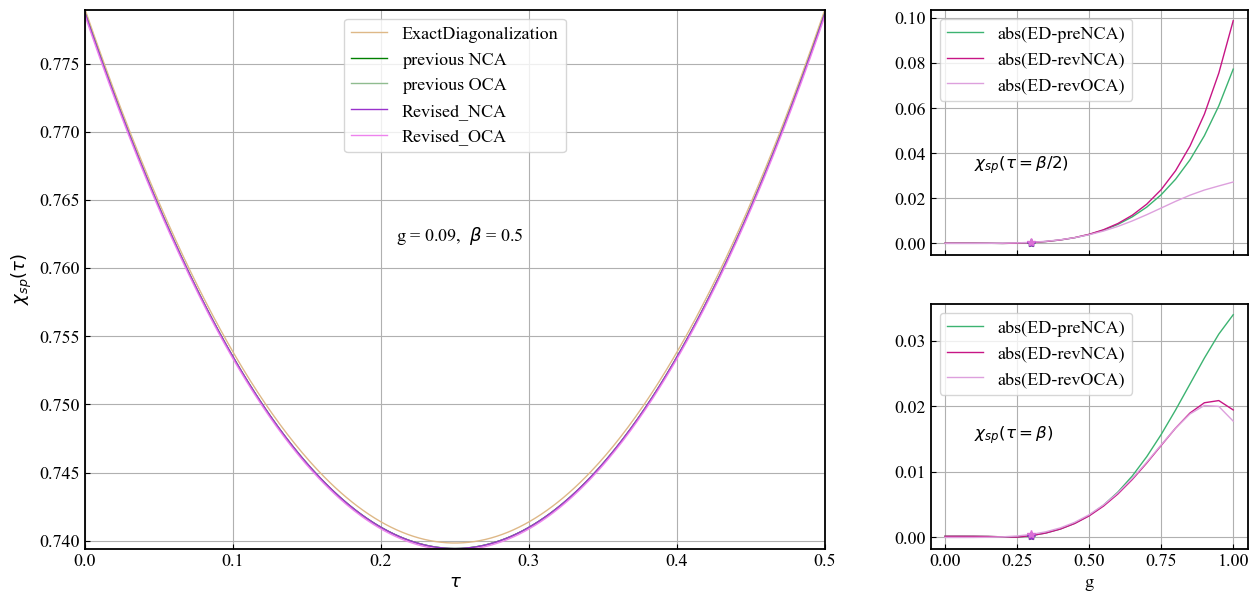

In [14]:
tit1 = str(gsqaure[gc])
tit2 = str(betamaxarray[0])

fig = plt.figure(figsize=(15,7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
gs = GridSpec(nrows=2, ncols=2, width_ratios=[7, 3], height_ratios=[1, 1])
mpl.rcParams['axes.linewidth'] = 1.3

ax0 = fig.add_subplot(gs[:, 0])
ax0.axis([min(tau05), max(tau05), min(globals()['RN_0_{}'.format(gc)]), max(globals()['ED_0_{}'.format(gc)])] )
ax0.plot(tau05,globals()['ED_0_{}'.format(gc)],label='ExactDiagonalization',linewidth='1',color = 'burlywood')
ax0.plot(tau05,globals()['N_0_{}'.format(gc)],label='previous NCA',linewidth='1', color = 'green')
ax0.plot(tau05,globals()['O_0_{}'.format(gc)],label='previous OCA',linewidth='1', color = 'darkseagreen')
ax0.plot(tau05,globals()['RN_0_{}'.format(gc)],label='Revised_NCA',linewidth='1', color = 'darkorchid')
ax0.plot(tau05,globals()['RO_0_{}'.format(gc)],label='Revised_OCA',linewidth='1', color = 'violet')
plt.text(0.21,0.762,'g = ' + tit1 + r',  $\beta$ = ' + tit2 ,fontsize=13)
plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')


ax1= fig.add_subplot(gs[0, 1])
ax1.plot(garray,Ntaumid0,label='abs(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax1.plot(garray,RNtaumid0,label='abs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax1.plot(garray,Otaumid0,label='abs(ED-revOCA)',linewidth='1',color='plum')
ax1.plot(garray[gc],Ntaumid0[gc],marker='*',color='green')
ax1.plot(garray[gc],RNtaumid0[gc],marker='*',color='darkorchid')
ax1.plot(garray[gc],Otaumid0[gc],marker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.text(0.1,0.033,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.legend()
plt.grid()

ax2= fig.add_subplot(gs[1, 1])
ax2.plot(garray,Ntaubeta0,label='abs(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax2.plot(garray,RNtaubeta0,label='abs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax2.plot(garray,Otaubeta0,label='abs(ED-revOCA)',linewidth='1',color='plum')
ax2.plot(garray[gc],Ntaubeta0[gc],marker='*',color='green')
ax2.plot(garray[gc],RNtaubeta0[gc],marker='*',color='darkorchid')
ax2.plot(garray[gc],Otaubeta0[gc],marker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.legend()
plt.text(0.1,0.015,r'$\chi_{sp}(\tau=\beta)$',fontsize=12)
plt.xlabel('g')
plt.grid()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])


'''
a = plt.axes([0.365, 0.58, 0.3, 0.2])
plt.plot(tau05,globals()['SIGNDEV_0_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'mediumvioletred')
plt.plot(tau05,globals()['PREDEV_0_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'mediumseagreen')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()
'''

plt.show()

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_94554/2657879680.py:52: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_x_axes().join(ax1, ax2)


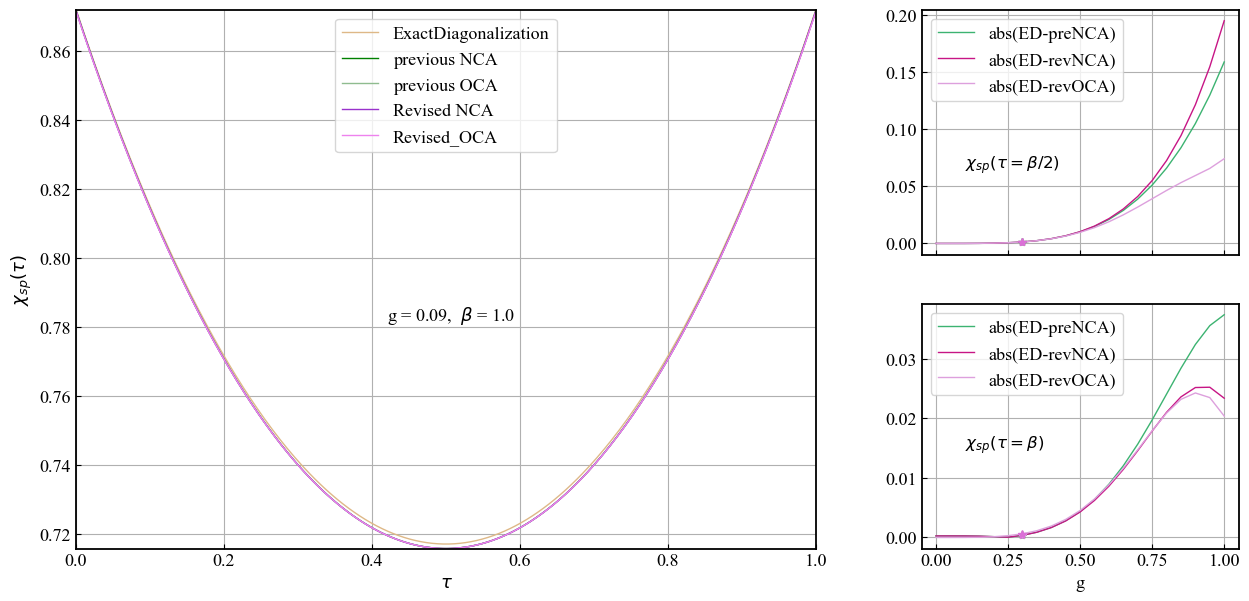

In [15]:
tit1 = str(gsqaure[gc])
tit2 = str(betamaxarray[1])

fig = plt.figure(figsize=(15,7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
gs = GridSpec(nrows=2, ncols=2, width_ratios=[7, 3], height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[:, 0])
plt.axis([min(tau1), max(tau1), min(globals()['RN_1_{}'.format(gc)]), max(globals()['ED_1_{}'.format(gc)])] )
plt.plot(tau1,globals()['ED_1_{}'.format(gc)],label='ExactDiagonalization',linewidth='1',color = 'burlywood')
plt.plot(tau1,globals()['N_1_{}'.format(gc)],label='previous NCA',linewidth='1', color = 'green')
plt.plot(tau1,globals()['O_1_{}'.format(gc)],label='previous OCA',linewidth='1', color = 'darkseagreen')
plt.plot(tau1,globals()['RN_1_{}'.format(gc)],label='Revised NCA',linewidth='1', color = 'darkorchid')
ax0.plot(tau1,globals()['RO_1_{}'.format(gc)],label='Revised_OCA',linewidth='1', color = 'violet')
plt.text(0.42,0.782,'g = ' + tit1 + r',  $\beta$ = ' + tit2 ,fontsize=13)
plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')

ax1= fig.add_subplot(gs[0, 1])
ax1.plot(garray,Ntaumid1,label='abs(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax1.plot(garray,RNtaumid1,label='abs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax1.plot(garray,Otaumid1,label='abs(ED-revOCA)',linewidth='1',color='plum')
ax1.plot(garray[gc],Ntaumid1[gc],marker='*',color='green')
ax1.plot(garray[gc],RNtaumid1[gc],marker='*',color='violet')
ax1.plot(garray[gc],Otaumid1[gc],marker='*',color='orchid')

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.text(0.1,0.066,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.legend()
plt.grid()

ax2= fig.add_subplot(gs[1, 1])
ax2.plot(garray,Ntaubeta1,label='abs(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax2.plot(garray,RNtaubeta1,label='abs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax2.plot(garray,Otaubeta1,label='abs(ED-revOCA)',linewidth='1',color='plum')
ax2.plot(garray[gc],Ntaubeta1[gc],marker='*',color='green')
ax2.plot(garray[gc],RNtaubeta1[gc],marker='*',color='violet')
ax2.plot(garray[gc],Otaubeta1[gc],marker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.text(0.1,0.015,r'$\chi_{sp}(\tau=\beta)$',fontsize=12)
plt.legend()
plt.xlabel('g')
plt.grid()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

'''
a = plt.axes([0.365, 0.25, 0.3, 0.2])
plt.plot(tau1,globals()['SIGNDEV_1_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'mediumvioletred')
plt.plot(tau1,globals()['PREDEV_1_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'mediumseagreen')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()
'''

plt.show()

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_94554/2936728341.py:52: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_x_axes().join(ax1, ax2)


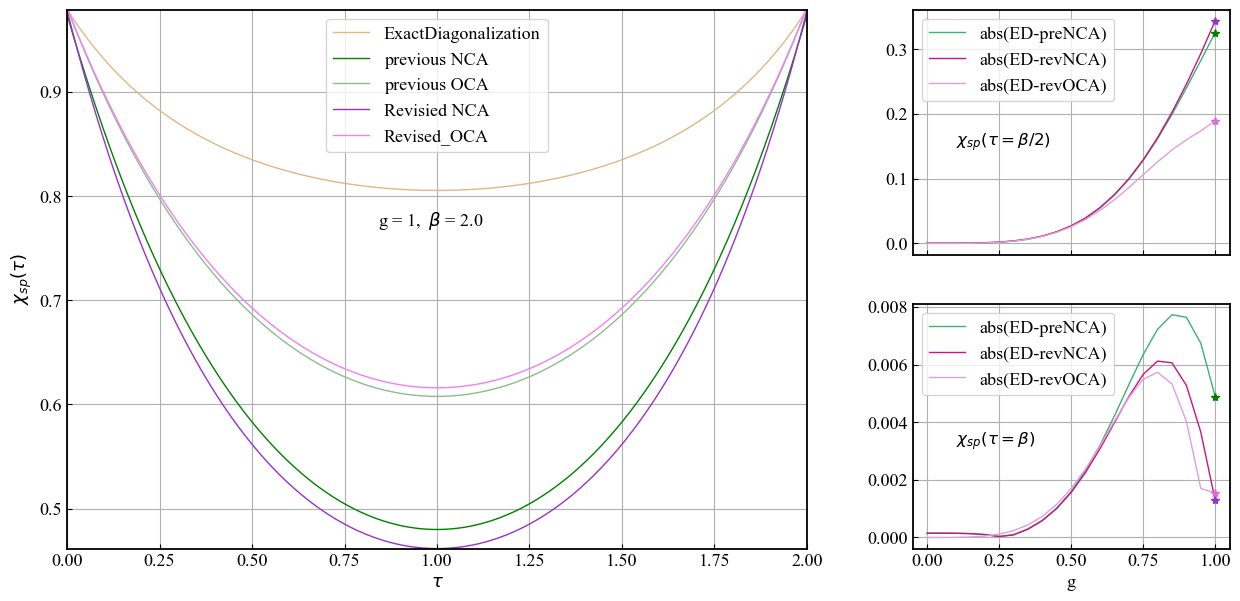

In [23]:
tit1 = str(gsqaure[gc])
tit2 = str(betamaxarray[2])

fig = plt.figure(figsize=(15,7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
gs = GridSpec(nrows=2, ncols=2, width_ratios=[7, 3], height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[:, 0])
plt.axis([min(tau2), max(tau2), min(globals()['RN_2_{}'.format(gc)]), max(globals()['ED_2_{}'.format(gc)])] )
plt.plot(tau2,globals()['ED_2_{}'.format(gc)],label='ExactDiagonalization',linewidth='1',color = 'burlywood')
plt.plot(tau2,globals()['N_2_{}'.format(gc)],label='previous NCA',linewidth='1', color = 'green')
plt.plot(tau2,globals()['O_2_{}'.format(gc)],label='previous OCA',linewidth='1', color = 'darkseagreen')
plt.plot(tau2,globals()['RN_2_{}'.format(gc)],label='Revisied NCA',linewidth='1', color = 'darkorchid')
plt.plot(tau2,globals()['RO_2_{}'.format(gc)],label='Revised_OCA',linewidth='1', color = 'violet')
plt.text(0.84,0.772,'g = ' + tit1 + r',  $\beta$ = ' + tit2 ,fontsize=13)
plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')


ax1= fig.add_subplot(gs[0, 1])
ax1.plot(garray,Ntaumid2,label='abs(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax1.plot(garray,RNtaumid2,label='abs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax1.plot(garray,Otaumid2,label='abs(ED-revOCA)',linewidth='1',color='plum')
ax1.plot(garray[gc],Ntaumid2[gc],marker='*',color='green')
ax1.plot(garray[gc],RNtaumid2[gc],marker='*',color='darkorchid')
ax1.plot(garray[gc],Otaumid2[gc],marker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.text(0.1,0.15,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.legend()
plt.grid()

ax2= fig.add_subplot(gs[1, 1])
ax2.plot(garray,Ntaubeta2,label='abs(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax2.plot(garray,RNtaubeta2,label='abs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax2.plot(garray,Otaubeta2,label='abs(ED-revOCA)',linewidth='1',color='plum')
ax2.plot(garray[gc],Ntaubeta2[gc],marker='*',color='green')
ax2.plot(garray[gc],RNtaubeta2[gc],marker='*',color='darkorchid')
ax2.plot(garray[gc],Otaubeta2[gc],marker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.text(0.1,0.0032,r'$\chi_{sp}(\tau=\beta)$',fontsize=12)
plt.legend()
plt.xlabel('g')
plt.grid()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])


'''
a = plt.axes([0.365, 0.3, 0.3, 0.2])
plt.plot(tau2,globals()['SIGNDEV_2_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'mediumvioletred')
plt.plot(tau2,globals()['PREDEV_2_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'orange')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()
'''

plt.show()

---- Test for Accuracy btw datas --------------

In [17]:
for p in range(21):
    globals()['DIFF{}'.format(p)] = np.abs(globals()['O_2_{}'.format(p)]-globals()['RO_2_{}'.format(p)])


Text(0.5, 1.0, 'Difference btw pre_OCA data with rev_OCA data in g = 0.49')

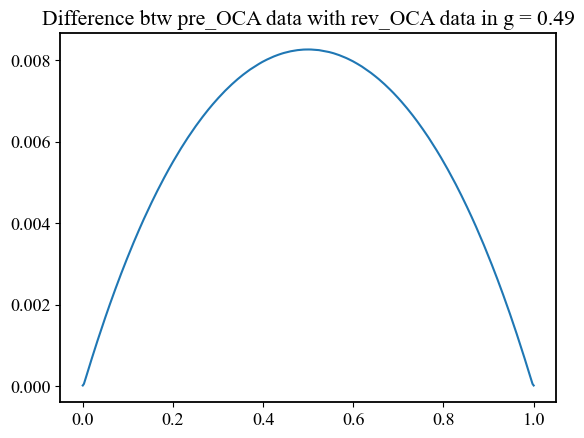

In [21]:
plt.plot(ta,DIFF20)
plt.title("Difference btw pre_OCA data with rev_OCA data in g = 0.49")